In [2]:
import seaborn as sns
flights=sns.load_dataset("flights")
tips=sns.load_dataset("tips")
iris=sns.load_dataset("iris")

# Zbiór IRIS

Na zbiór danych składają się wyniki pomiarów 150 kwiatów kosaćca z 3 różnych gatunków: Setosa, Versicolor, Virginica. Każdy kwiat reprezentuje oddzielny wiersz w zbiorze danych (pojedynczy przypadek, instancja), natomiast kolumna reprezentuje cechy: szerokość płatka, długość płatka, szerokość działki kielicha, długość działki kielicha. 
### Każdy wymiar cechy jest 150-elementowym wektorem kolumnowym. 

In [3]:
from IPython.display import Image
Image(filename='Iris.png')

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.png'

In [ ]:
flights

In [ ]:
tips

In [ ]:
flights.shape

In [ ]:
flights.size

In [ ]:
len(flights)

In [ ]:
flights.dtypes

In [4]:
flights['month']

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
139    Aug
140    Sep
141    Oct
142    Nov
143    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [5]:
flights.month

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
139    Aug
140    Sep
141    Oct
142    Nov
143    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [6]:
flights.month.dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

In [7]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [8]:
flights.columns=['a','b','c']

In [9]:
flights

,a,b,c
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [10]:
import numpy as np
flights.a.index

RangeIndex(start=0, stop=144, step=1)

In [11]:
y=flights.set_index(np.linspace(0,1,144))

In [12]:
y

,a,b,c
0.000000,1949,Jan,112
0.006993,1949,Feb,118
0.013986,1949,Mar,132
0.020979,1949,Apr,129
0.027972,1949,May,121
...,...,...,...
0.972028,1960,Aug,606
0.979021,1960,Sep,508
0.986014,1960,Oct,461
0.993007,1960,Nov,390


In [13]:
y.index.name="Wiersze"
y.columns.name="Kolumny"
y.head()

Kolumny,a,b,c
Wiersze,,,
0.000000,1949,Jan,112
0.006993,1949,Feb,118
0.013986,1949,Mar,132
0.020979,1949,Apr,129
0.027972,1949,May,121


# Podstawowe statystyki

In [14]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
tips.mean()

/tmp/ipykernel_1516785/618375813.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tips.mean()


total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [16]:
tips.total_bill.mean()

19.78594262295082

# Tabela przestawna

In [17]:
import pandas as pd
pd.pivot_table(tips[["smoker", "total_bill","tip"]],index=["smoker"], aggfunc="mean")

,tip,total_bill
smoker,,
Yes,3.008710,20.756344
No,2.991854,19.188278


# Możemy to wykonać nieco inaczej....

In [18]:
nowa_ramka=tips[["tip","total_bill","smoker"]]

In [19]:
nowa_ramka1=tips.iloc[:, 0:3]

In [20]:
nowa_ramka1

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
...,...,...,...
239,29.03,5.92,Male
240,27.18,2.00,Female
241,22.67,2.00,Male
242,17.82,1.75,Male


In [21]:
nowa_ramka.groupby("smoker").describe()

tip                                                  total_bill  \
        count      mean       std  min  25%   50%    75%   max      count   
smoker                                                                      
Yes      93.0  3.008710  1.401468  1.0  2.0  3.00  3.680  10.0       93.0   
No      151.0  2.991854  1.377190  1.0  2.0  2.74  3.505   9.0      151.0   

                                                                 
             mean       std   min     25%    50%     75%    max  
smoker                                                           
Yes     20.756344  9.832154  3.07  13.420  17.92  26.860  50.81  
No      19.188278  8.255582  7.25  13.325  17.59  22.755  48.33

In [22]:
nowa_ramka_group=nowa_ramka.groupby("smoker")


In [23]:
nowa_ramka_group # metoda zwarca obiekt iterowalny

# Tablice kontyngencji

In [24]:
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [25]:
pd.crosstab(tips.smoker,tips.sex)

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


In [26]:
tips2=tips.sample(n=20)
tips2.sort_values(by='tip')


,total_bill,tip,sex,smoker,day,time,size
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
195,7.56,1.44,Male,No,Thur,Lunch,2
130,19.08,1.50,Male,No,Thur,Lunch,2
117,10.65,1.50,Female,No,Thur,Lunch,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
57,26.41,1.50,Female,No,Sat,Dinner,2
105,15.36,1.64,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
8,15.04,1.96,Male,No,Sun,Dinner,2


# Zadanie 

Zaimportuj ramkę danych flights, a następnie:
- wyznacz podstawowe statystyki dla tej ramki
- wyznacz statystyki indywidualnie dla danych grup kwiatów
- zwizualizuj średnie wyniki na wykresie
- sprawdź czy istnieją korelacje pomiędzy zmiennymi w analizowanej ramce dancych.

In [27]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [43]:
nowa_ramka = iris.iloc[1:51, 3:1] # ilośc kolumn 2, ilość wierszy 50
nowa_ramka

""
1
2
3
4
5
6
7
8
9
10


In [45]:
nowy_iris = iris.iloc[0:50, :]
nowy_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [50]:
grupy = iris.groupby('species')
grupy # tworzy obiekt, nie pokazuje

In [49]:
grupy = iris.groupby('species').describe()
grupy # tworzy obiekt, nie pokazuje

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

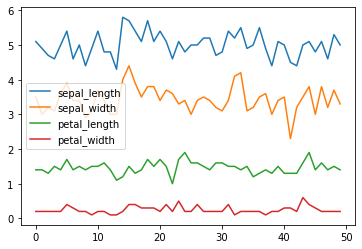

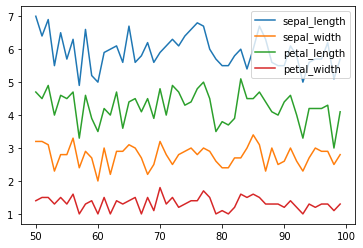

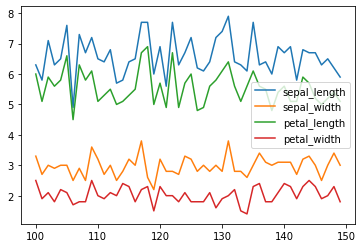

In [51]:
import matplotlib.pyplot as plt

iris_new = iris.groupby('species').plot()
iris_new

species
setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

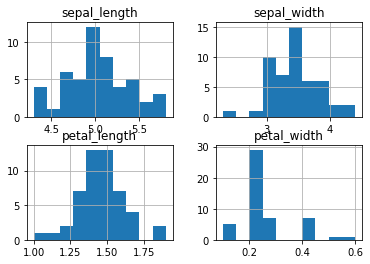

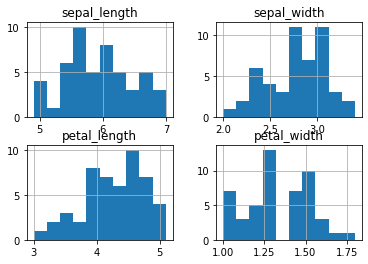

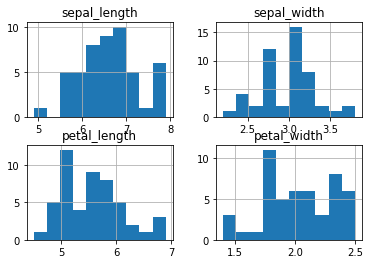

In [52]:
iris_new2 = iris.groupby('species').hist() # histogram
iris_new2

setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

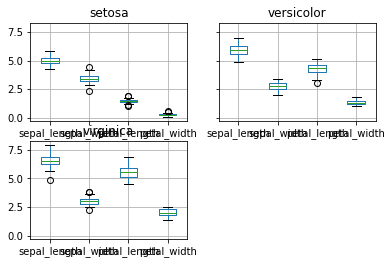

In [53]:
iris_new3 = iris.groupby('species').boxplot()
iris_new3

In [ ]:
# moduł z szeregiem funkcji do rysowania (matplotlib)

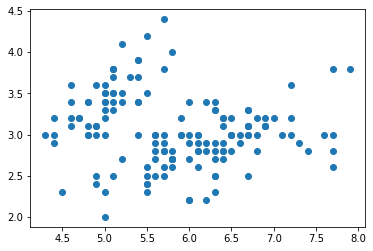

In [54]:
iris_new4 = iris.groupby('species')
plt.scatter(iris['sepal_length'], iris['sepal_width'])
iris_new4

In [56]:
import seaborn as sns

sns.heatmap(iris)

ValueError: could not convert string to float: 'setosa'

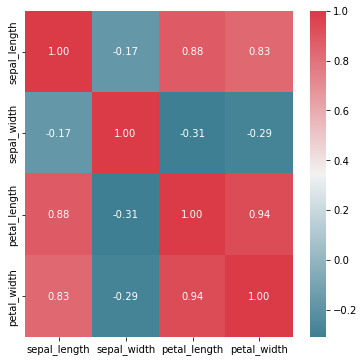

In [57]:
def heatMap(df): # zależności pomiędzy zmiennymi
    #Create Correlation df
    corr = df.corr(method='spearman') # nieparametryczny, BLIŻSZE PRAWDZIE!!!!!!!!!
    #Plot figsize
    fig, ax = plt.subplots(figsize=(6,6))
    #fig, ax = plt.subplots()
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    #Apply xticks
    #plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    #plt.yticks(range(len(corr.columns)), corr.columns)
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 1, top)
    #show plot
    plt.show()
    fig.savefig('korelacje_cct_kf.pdf') #zapisanie do pdf tej mapy


heatMap(iris)

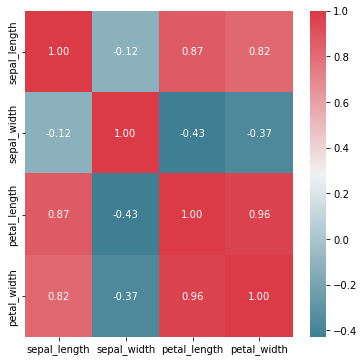

In [59]:
def heatMap(df): # zależności pomiędzy zmiennymi
    #Create Correlation df
    corr = df.corr(method='pearson')
    #Plot figsize
    fig, ax = plt.subplots(figsize=(6,6))
    #fig, ax = plt.subplots()
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    #Apply xticks
    #plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    #plt.yticks(range(len(corr.columns)), corr.columns)
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 1, top)
    #show plot
    plt.show()
    fig.savefig('korelacje_cct_kf.pdf') #zapisanie do pdf tej mapy


heatMap(iris)

## Zadanie domowe!